# Φόρτωση Βιβλιοθηκών

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import np_utils, normalize
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from timeit import default_timer as timer
from keras.initializers import RandomNormal
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import L2

# 1. Διερεύνηση απόδοσης μοντέλου με διαφοροποιήσεις στο σχεδιασμό και τη διαδικασία εκπαίδευσης

Θα εκπαιδεύσουμε MLP δίκτυου για διάφορες μεθόδους βελτιστοποίησης, κανονικοποίσης και αρχικοποίησης. Αρχικά φορτώνουμε και κανονικοποιούμε τα δεδομένα και τα χωρίζουμε σε train και validation datasets

In [2]:
#load mnist dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

#Data normalization/scaling

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

#convert to binary class matrix
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

#split train data to train and validation datasets
x_train, x_val = tf.split(x_train, [int(48000), int(12000)], 0)
y_train, y_val = tf.split(y_train, [int(48000), int(12000)], 0)


- Εκπαίδευση δικτύου με 3 διαφορετικά batch sizes: online(1), minibatch(256) και batch(Ntrain)


Training with batch size =48000 complete in 26.95 seconds.


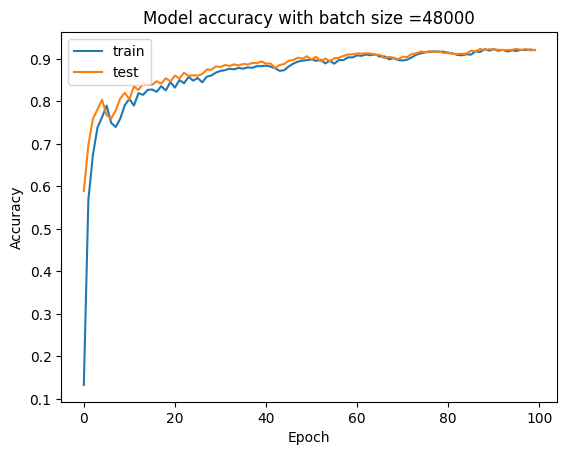

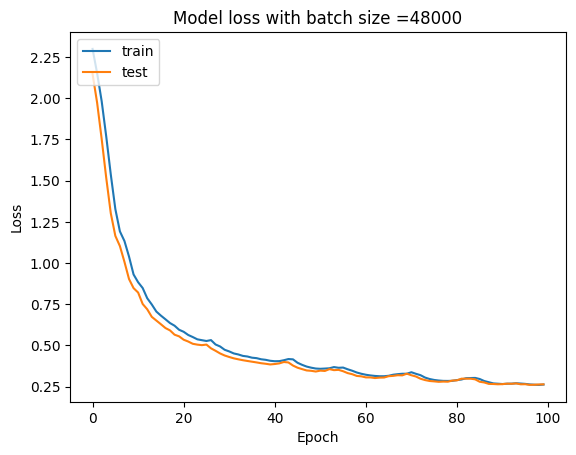

Training with batch size =256 complete in 48.81 seconds.


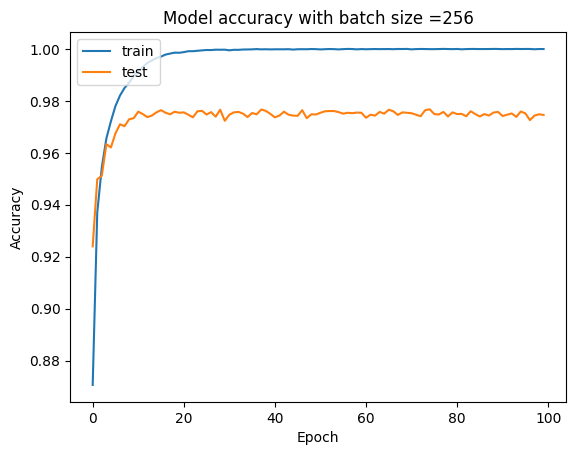

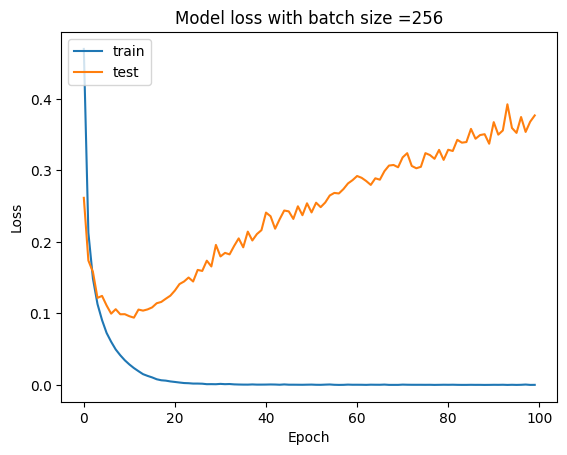

Training with batch size =1 complete in 4505.64 seconds.


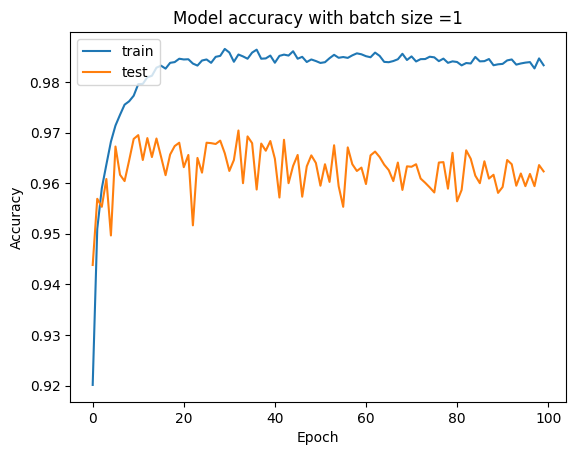

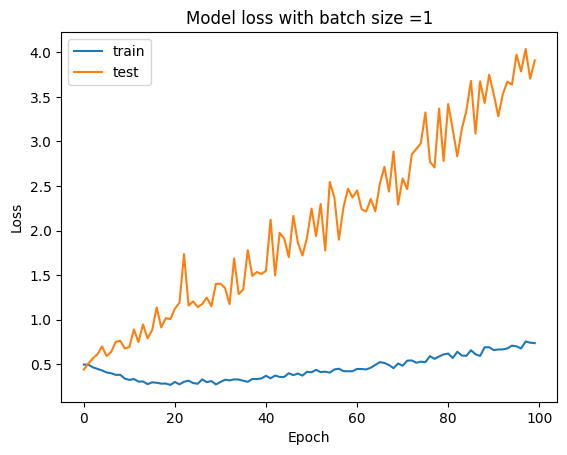

In [3]:
batch = [48000,256,1]

for i in range(0,3):
    model = Sequential()
    model.add(Flatten()) 
    model.add(Dense(128, activation=tf.nn.relu)) 
    model.add(Dense(256, activation=tf.nn.relu)) 
    model.add(Dense(10, activation=tf.nn.softmax)) 

    model.compile(loss = "categorical_crossentropy",
                 metrics = ['accuracy'])
    
    start = timer()
    history = model.fit(x_train,
                  y_train,
                  batch_size = batch[i], 
                  epochs = 100,
                  validation_data = (x_val, y_val),
                  verbose=0)

    end = timer()
    completion_time = "{:.2f}".format(end-start)
    
    print('Training with batch size =' + str(batch[i]) + ' complete in ' + str(completion_time) + ' seconds.')
    
    #Plot results

    #Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy with batch size =' +str(batch[i]))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('3.1.1) Accuracy' + str(i+1) + '.pdf')
    plt.show()
    
    #Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss with batch size =' + str(batch[i]))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('3.1.1) Loss' + str(i+1) + '.pdf')
    plt.show()


Σχολιασμός αποτελεσμάτων
- **Ως προς τον χρόνο εκτέλεσης**, οπώς είναι αναμενόμενο το δίκτυο με batch size=1 έχει τον μεγαλύτερο χρόνο εκτέλεσης
- **Ως προς τις καμπύλες ακριβείας** το μοντέλο με batch size=Ntrain πετυχαίνει την μεγαλύτερη ακρίβεια
- **Ως προς τις καμπύλες κόστους** το μοντέλο με batch size=Ntrain πετυχαίνει το μικρότερο κόστος
- Για τα μοντέλα με batch size=[Ntrain,256] δεν παρατηρώ underfitting, καθώς οι καμπύλες ακριβείας και κόστους για τα training sets συγκλίνουν στο 1 και 0 αντίστοιχα. Οι αντίστοιχες καμπύλες για το μοντέλο με batch size=1 έχουν μεγαλύτερη διακύμανση, αρα μπορούμε να πούμε ότι είναι underfitted
- Για το μοντέλο με batch size=Ntrain δεν παρατηρείται overfitting, καθώς οι καμπύλες ακριβείας και κόστους για το validation set δεν αποκλίνουν από αυτές για το train set και συγκλίνουν στο 1 και 0. Αντίθετα, για τα μοντέλα με batch size=[256,1] παρατηρείται μεγαλύτερη διακύμανση στις καμπύλες των validation set άρα υπάρχει overfitting

- Εκπαίδευση δικτύου με RMSProp optimizer με lr = 0.001, ρ = [0.001,0.99]

Training with RMSPRop optimizer, ρ=0.001 and lr =0.001complete in 4505.64 seconds.


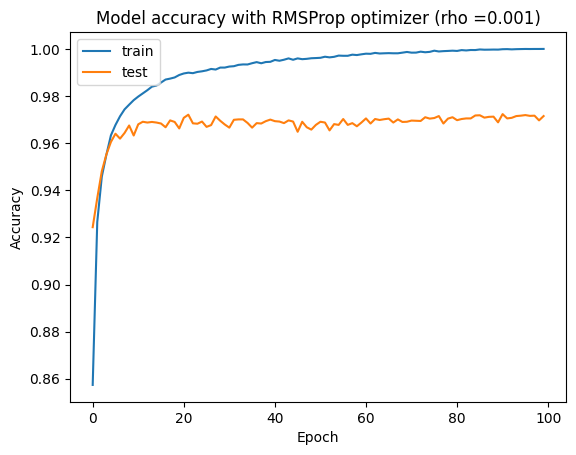

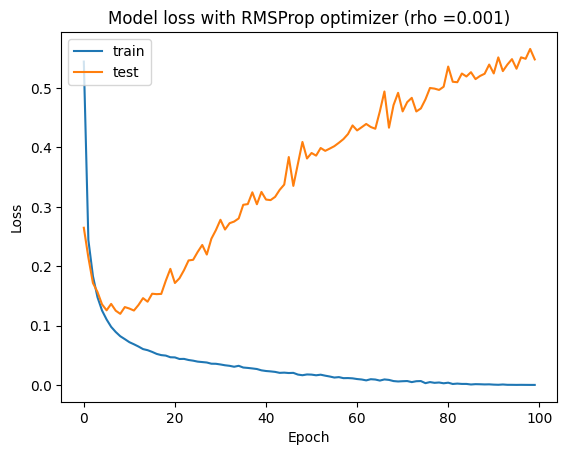

Training with RMSPRop optimizer, ρ=0.99 and lr =0.001complete in 4505.64 seconds.


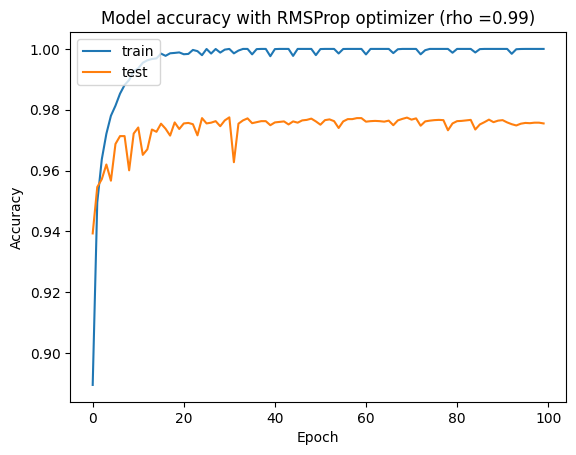

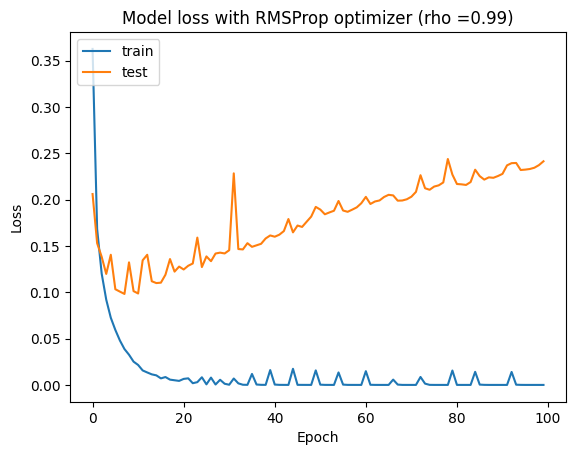

In [4]:
batch = 256
lr = 1e-3
r = [0.001,0.99]

for i in range(0,2):
    model = Sequential()
    model.add(Flatten()) 
    model.add(Dense(128, activation=tf.nn.relu)) 
    model.add(Dense(256, activation=tf.nn.relu)) 
    model.add(Dense(10, activation=tf.nn.softmax)) 

    model.compile(optimizer = RMSprop(learning_rate=lr, rho = r[i]),
                  loss = "categorical_crossentropy",
                  metrics = ['accuracy'])

    start = timer()
    history = model.fit(x_train,
                        y_train,
                        batch_size = batch, 
                        epochs = 100,
                        validation_data = (x_val, y_val),
                        verbose=0)

    end = timer()
    
    print('Training with RMSPRop optimizer, ρ=' + str(r[i]) + ' and lr =' + str(lr) + 'complete in ' + str(completion_time) + ' seconds.')
    
    #Plot results

    #Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy with RMSProp optimizer (rho =' + str(r[i]) +')')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('3.1.2) Accuracy' + str(i+1) + '.pdf')
    plt.show()
    
    #Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss with RMSProp optimizer (rho =' + str(r[i]) +')')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('3.1.2) Loss' + str(i+1) + '.pdf')
    plt.show()



Σχολιασμός αποτελεσμάτων
- **Ως προς τον χρόνο εκτέλεσης**, τα δύο δίκτυα έχουν παρόμοιο χρόνο εκτέλεσης
- Και για τα δύο δίκτυα παρατηρείται overfitting λόγω μεγάλης διακύμανσης των καμπυλών ακριβείας και κόστους των validation sets, ενώ δεν παρατηρείται unedfitting

- Εκπαίδευση δικτύου με SGD optimizer, lr = 0.01 και w ~ N(10,σ^2)

Training with SGD optimizer complete in 4505.64 seconds.


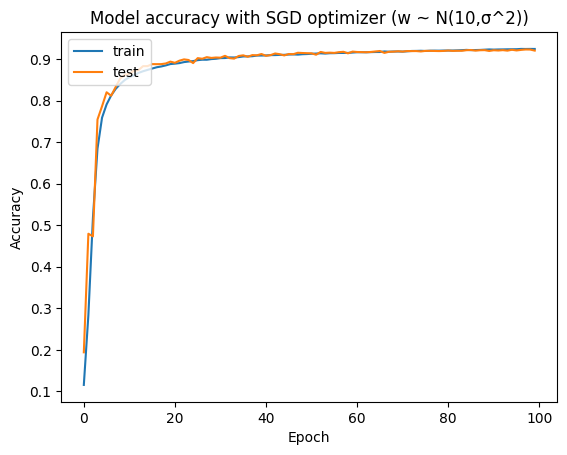

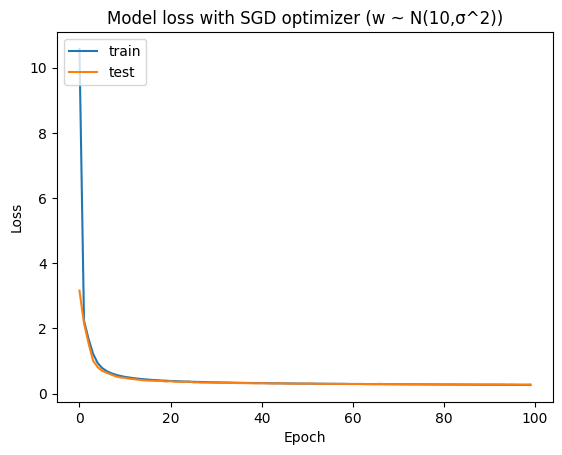

In [5]:
batch = 256
lr = 0.01

model = Sequential()
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0)))
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0)))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0)))

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=lr),
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size = batch, 
                    epochs = 100,
                    validation_data = (x_val, y_val),
                    verbose=0)
end = timer()

print('Training with SGD optimizer complete in ' + str(completion_time) + ' seconds.')

#Plot results

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with SGD optimizer (w ~ N(10,σ^2))')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('3.1.3) Accuracy.pdf')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss with SGD optimizer (w ~ N(10,σ^2))')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('3.1.3) Loss.pdf')
plt.show()



Σχολιασμός αποτελεσμάτων
- Δεν παρατηρείται ούτε overfitting ούτε underfitting

- Εκπαίδευση δικτύου με SGD optimizer και L2 κανονικοποίηση με α = [0.1,0.01,0.001]

Training with SGD optimizer and L2 regularization with alpha=0.1 complete in 4505.64 seconds.


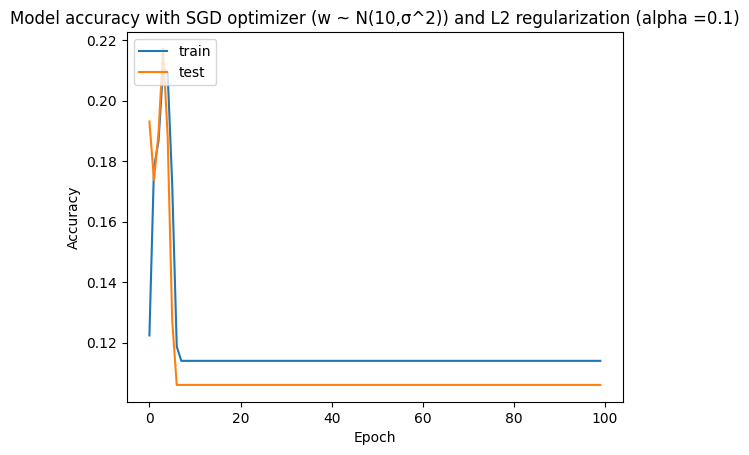

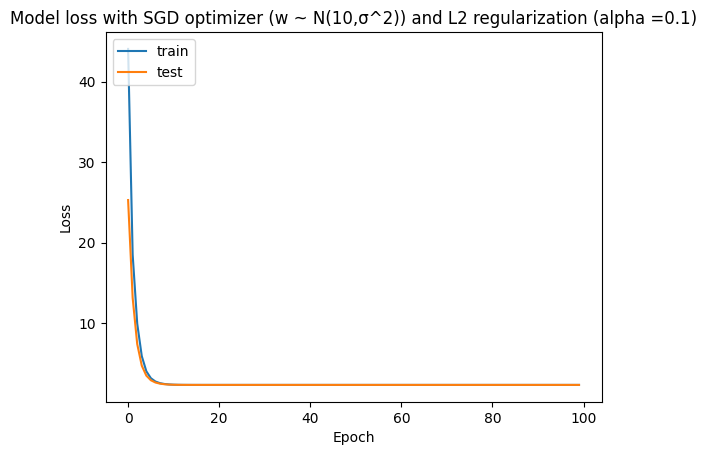

Training with SGD optimizer and L2 regularization with alpha=0.01 complete in 4505.64 seconds.


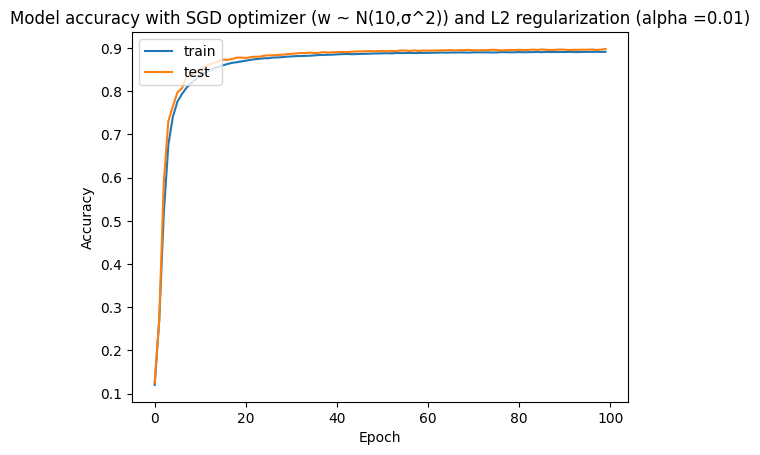

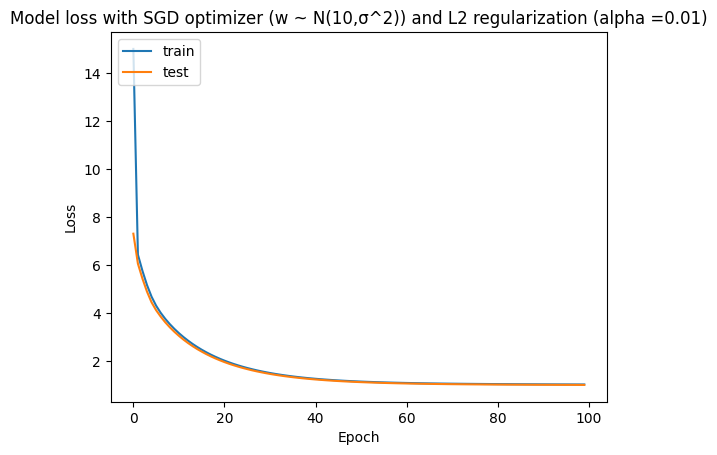

Training with SGD optimizer and L2 regularization with alpha=0.001 complete in 4505.64 seconds.


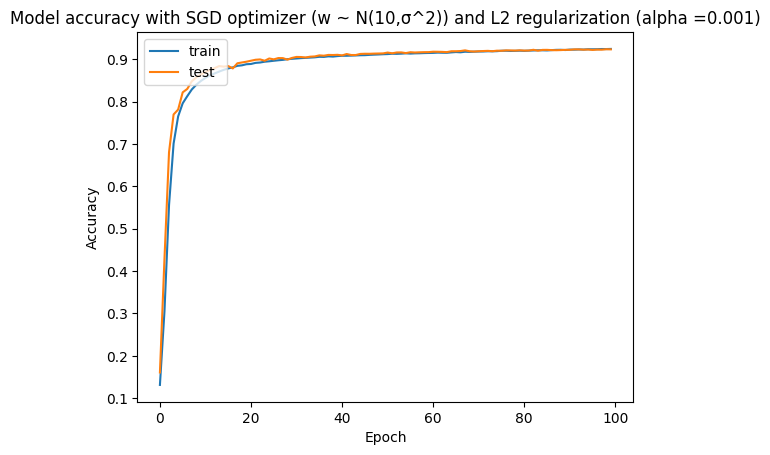

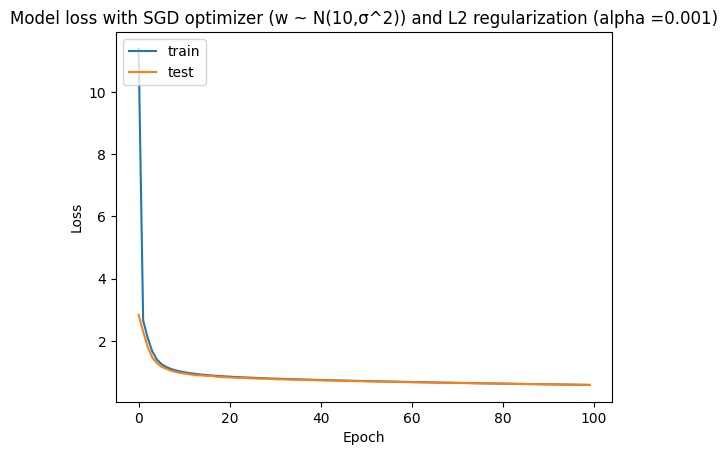

In [7]:
alpha = [0.1,0.01,0.001]
batch = 256

for i in range (0,3):
    model = Sequential()
    model.add(Flatten()) 
    model.add(Dense(128, activation=tf.nn.relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0), kernel_regularizer= regularizers.L2(alpha[i])))
    model.add(Dense(256, activation=tf.nn.relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0), kernel_regularizer= L2(alpha[i])))
    model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0), kernel_regularizer= regularizers.L2(alpha[i])))

    model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                  loss = "categorical_crossentropy",
                  metrics = ['accuracy'])

    start = timer()
    history = model.fit(x_train,
                        y_train,
                        batch_size = batch, 
                        epochs = 100,
                        validation_data = (x_val, y_val),
                        verbose=0)

    end = timer()
    
    print('Training with SGD optimizer and L2 regularization with alpha=' + str(alpha[i]) + ' complete in ' + str(completion_time) + ' seconds.')

    #Plot results

    #Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy with SGD optimizer (w ~ N(10,σ^2)) and L2 regularization (alpha =' + str(alpha[i]) +')')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('3.1.4) Accuracy' + str(i) + '.pdf')
    plt.show()

    #Loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss with SGD optimizer (w ~ N(10,σ^2)) and L2 regularization (alpha =' + str(alpha[i]) +')')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('3.1.4) Loss' + str(i) + '.pdf')
    plt.show()



Σχολιασμός αποτελεσμάτων
- **Ως προς τον χρόνο εκτέλεσης**, τα τρία δίκτυα έχουν παρόμοιο χρόνο εκτέλεσης
-  Δεν παρατηρείται ούτε overfitting ούτε unedfitting

-  Εκπαίδευση δικτύου με SGD optimizer, L1 κανονικοποίηση και Dropout

Training with SGD optimizer, L1 regularization and Dropout complete in 4505.64 seconds.


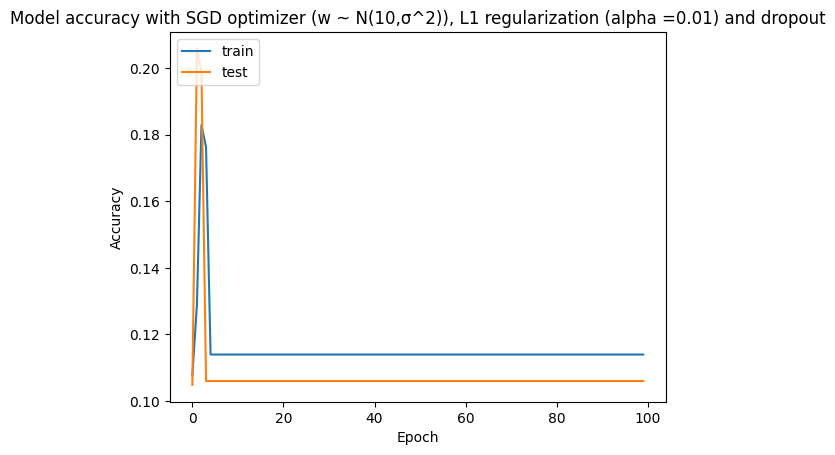

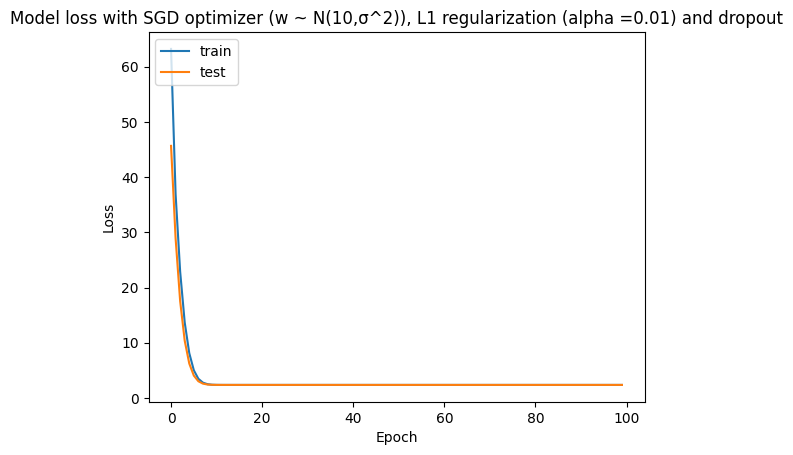

In [9]:
batch = 256
alpha = 0.01
dropout_probability = 0.3

model = Sequential()
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0), kernel_regularizer= regularizers.L1(alpha)))
model.add(Dropout(dropout_probability))
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0), kernel_regularizer= regularizers.L1(alpha)))
model.add(Dropout(dropout_probability))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer = tf.keras.initializers.RandomNormal(mean=10.0/255.0), kernel_regularizer= regularizers.L1(alpha)))

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size = batch, 
                    epochs = 100,
                    validation_data = (x_val, y_val),
                    verbose=0)
end = timer()

print('Training with SGD optimizer, L1 regularization and Dropout complete in ' + str(completion_time) + ' seconds.')

#Plot results

#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with SGD optimizer (w ~ N(10,σ^2)), L1 regularization (alpha =' + str(alpha) +') and dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('3.1.5) Accuracy.pdf')
plt.show()

#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss with SGD optimizer (w ~ N(10,σ^2)), L1 regularization (alpha =' + str(alpha) +') and dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('3.1.5) Loss.pdf')
plt.show()



Σχολιασμός αποτελεσμάτων
- Δεν παρατηρείται ούτε overfitting ούτε underfitting